<h1 style="text-align: center;">GLOBAL SOLUTION 2024</h1>

## Grupo: Guilherme Pagani (1), Leonardo Garcia (2), Rodrigo Cabrera (3) // RMs: 99445 (1), 99471 (2), 550227 (3).

<h1 style="text-align: center;">Resolução</h1>

### Imports Necessários 


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.circuit.library import QFT
import numpy as np
import random as rd
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler, PrimitiveJob
import math


<h1 style="text-align: center;">1. Primeiro Passo</h1>
<strong>
Inicialmente, deve-se projetar um algoritmo que constroi um circuito quantico capaz de receber uma sequencia n de medições de tempo referente ao periodo medido das ondas em uma regiao litoranea (em segundos), converte-las para portas de phase P de acordo com a equação apresentada, obter o periodo correspondente por meio da IQFT e compara-lo com o valor medio dos periodos.
</strong>


### 1.1
*Na seguinte parte, geramos um número aleatório cujo definirá quantos qubits haverá no circuito, esse número aleatório representa medições de tempo, ou seja, quantos períodos teve em certo tempo, adicionamos em uma lista para separar cada item*

In [2]:
medicoes_lista = [] 
n = rd.randint(4,10)

for i in range(n):
    j = round(rd.uniform(2,5),2)
    medicoes_lista.append(j)

print("Número de Medições:",n)
print("Períodos =",medicoes_lista)

Número de Medições: 8
Períodos = [3.86, 4.99, 2.81, 2.72, 3.46, 4.88, 2.8, 2.42]


### 1.2
*Implementação da IQFT*

Circuito IQFT para 3.86


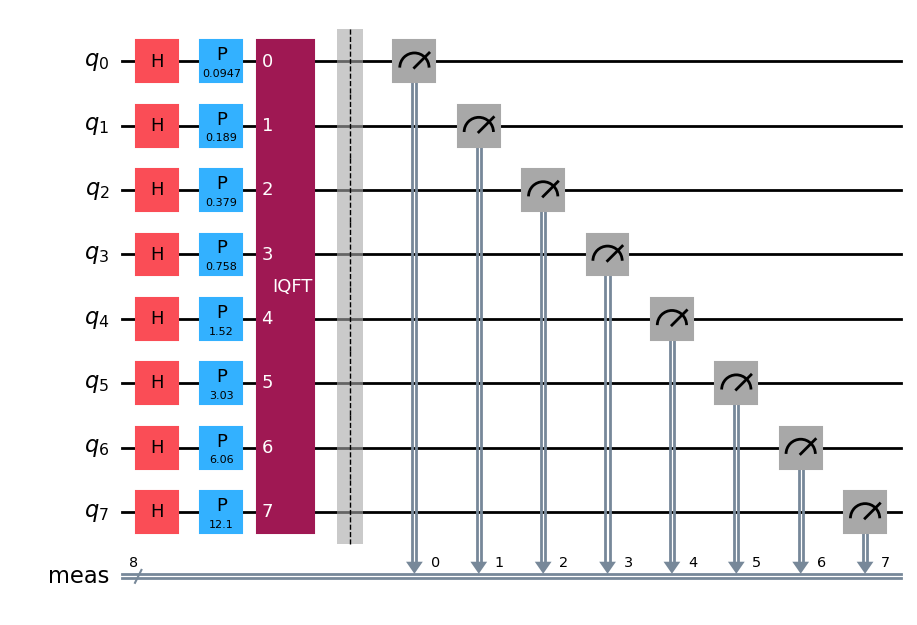

Circuito IQFT para 4.99


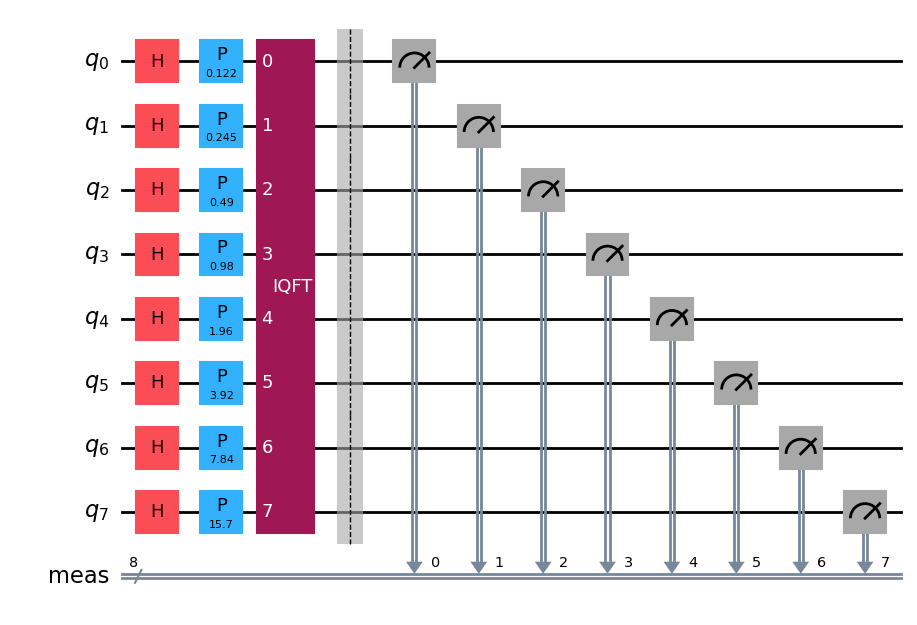

Circuito IQFT para 2.81


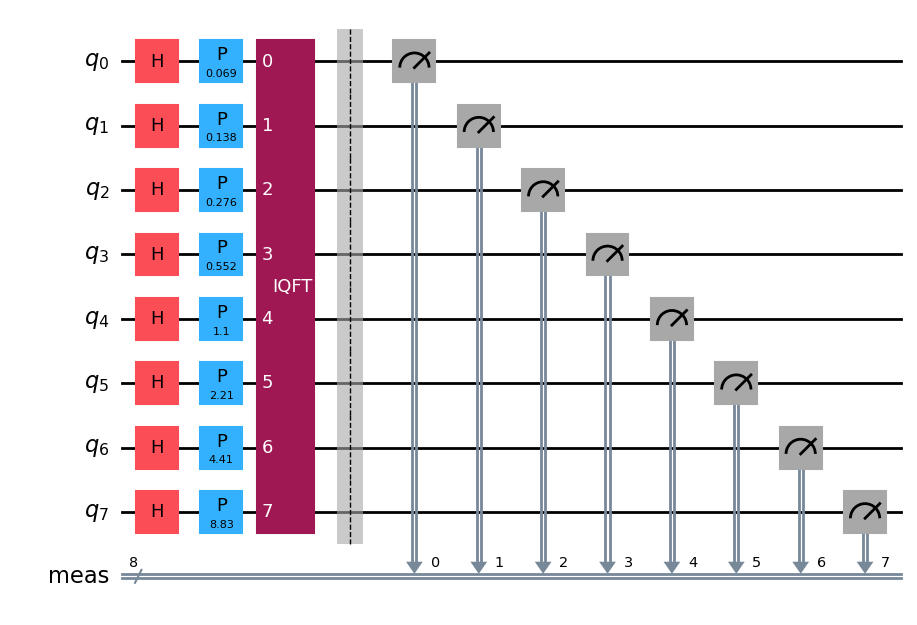

Circuito IQFT para 2.72


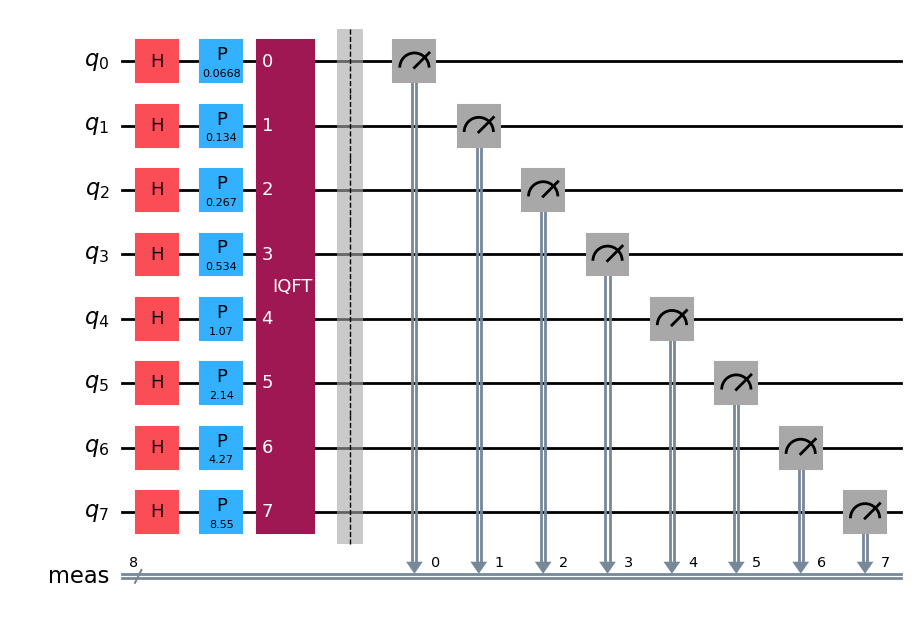

Circuito IQFT para 3.46


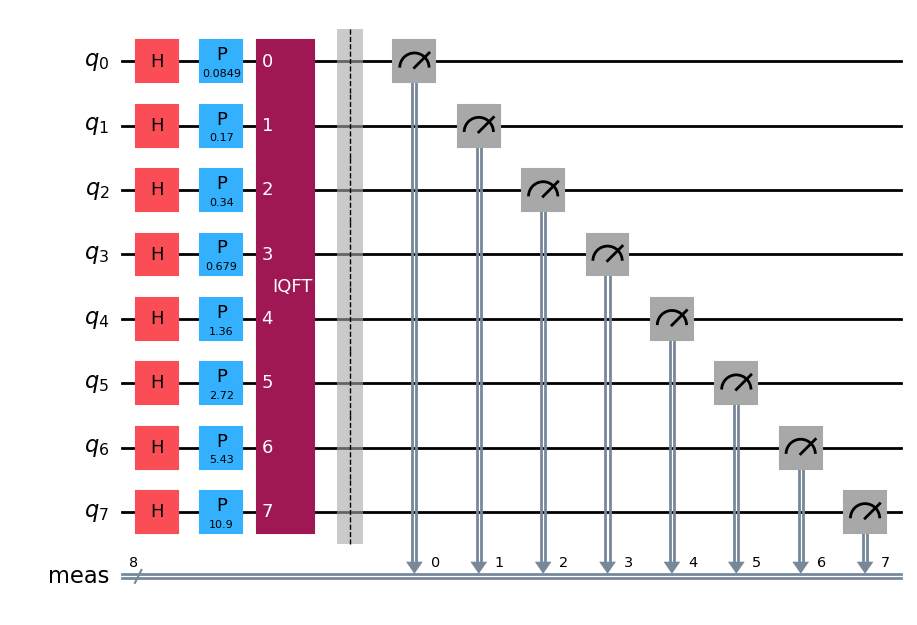

Circuito IQFT para 4.88


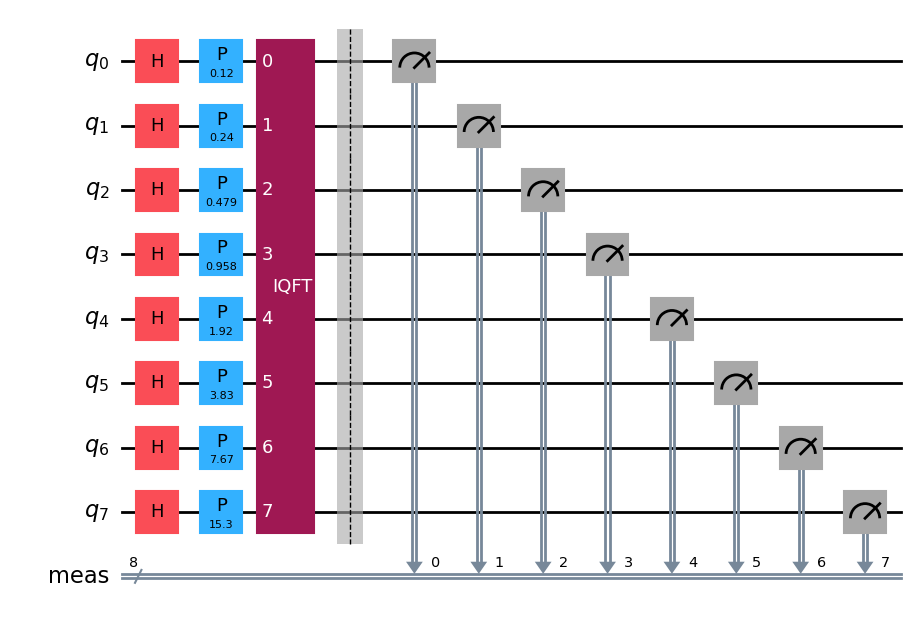

Circuito IQFT para 2.8


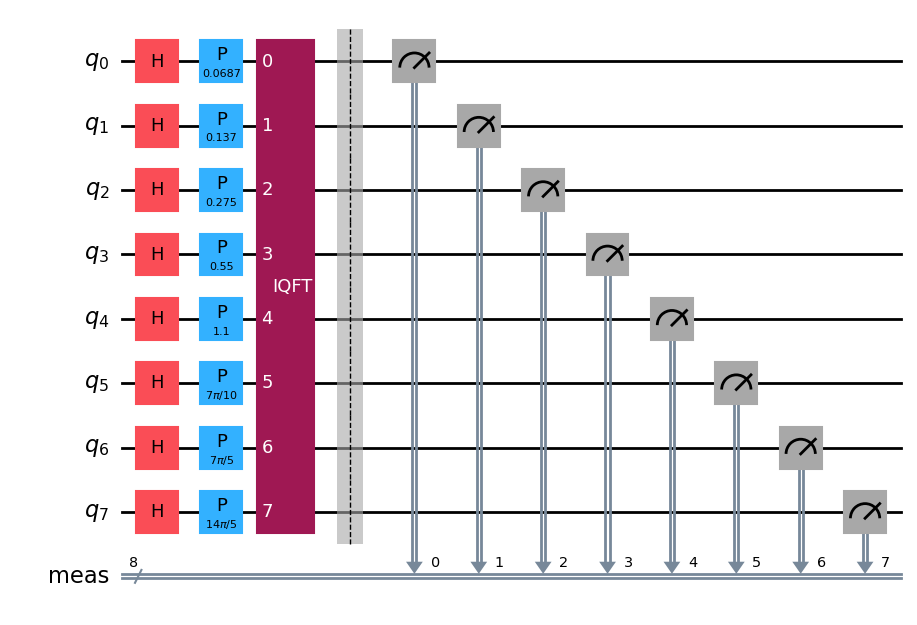

Circuito IQFT para 2.42


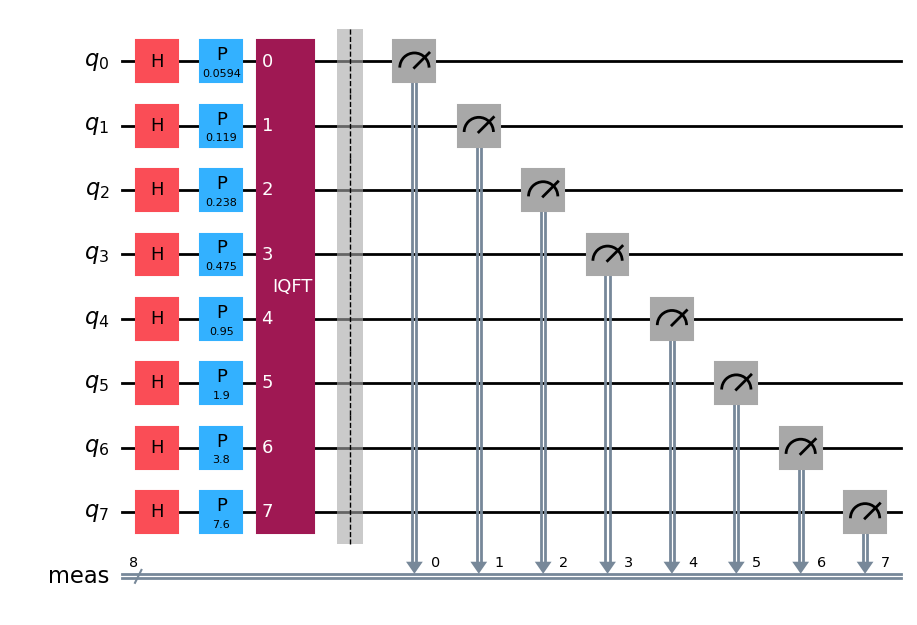

Períodos calculados = [4, 5, 3, 3, 4, 5, 2, 2]


In [3]:
def fourrier_quantum(num_qubits,medicoes_lista):
    
    periodos = []

    for i, periodo in enumerate(medicoes_lista):
        
        qc = QuantumCircuit(num_qubits)

        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)

        qc.measure_all()
        print("Circuito IQFT para",periodo)
        display(qc.draw('mpl'))


        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)

        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()


        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
        
        

    return periodos

periodos_resultados = fourrier_quantum(n, medicoes_lista)
print("Períodos calculados =", periodos_resultados)

In [4]:
media_periodos = np.mean(medicoes_lista)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média após o Circuito",media_periodos_iqft)

Média antes do Circuito: 3.4924999999999997
Média após o Circuito 3.5


<h1 style="text-align: center;">2. Segundo Passo</h1>
<strong>
Introdução de um erro de +- 10% (aleatório) e repetir o mesmo passo do processo 1. Ao final, deve-se ter discussão do grupo sobre os resultados obtidos de no mínimo dois paragrafos.
</strong>


### 1.1 
Introdução de erros (-10% ou 10% sobre o valor original)

In [5]:
medicoes_com_erro = []
for m in medicoes_lista:
    erro_percentual = rd.uniform(-0.1, 0.1) 
    valor_com_erro = round(m * (1 + erro_percentual), 2)
    medicoes_com_erro.append(valor_com_erro)

print("Períodos com Erro =", medicoes_com_erro)

Períodos com Erro = [4.21, 5.25, 2.7, 2.95, 3.74, 4.49, 2.78, 2.25]


### 1.2 
Implementação do IQFT

Circuito IQFT para 4.21


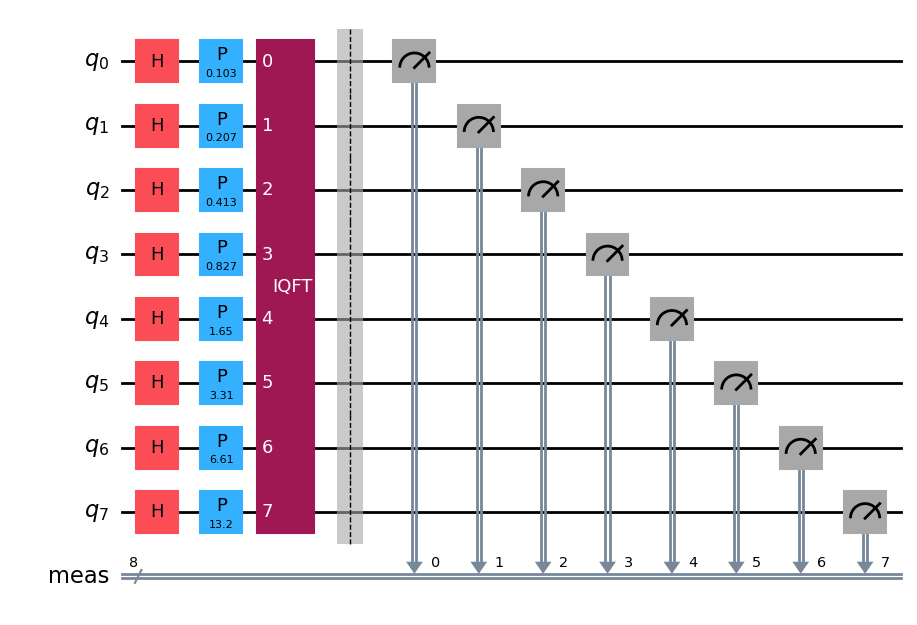

Circuito IQFT para 5.25


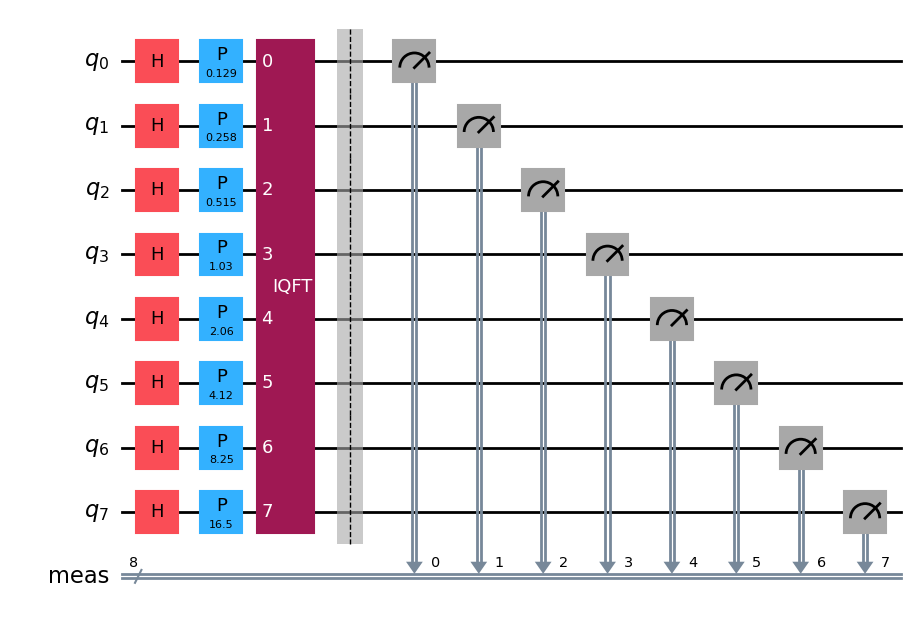

Circuito IQFT para 2.7


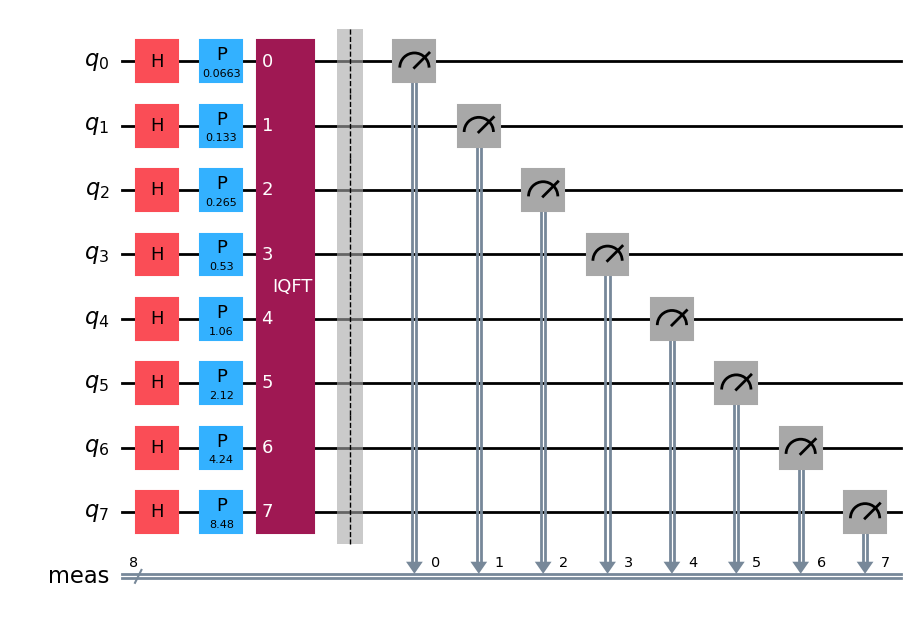

Circuito IQFT para 2.95


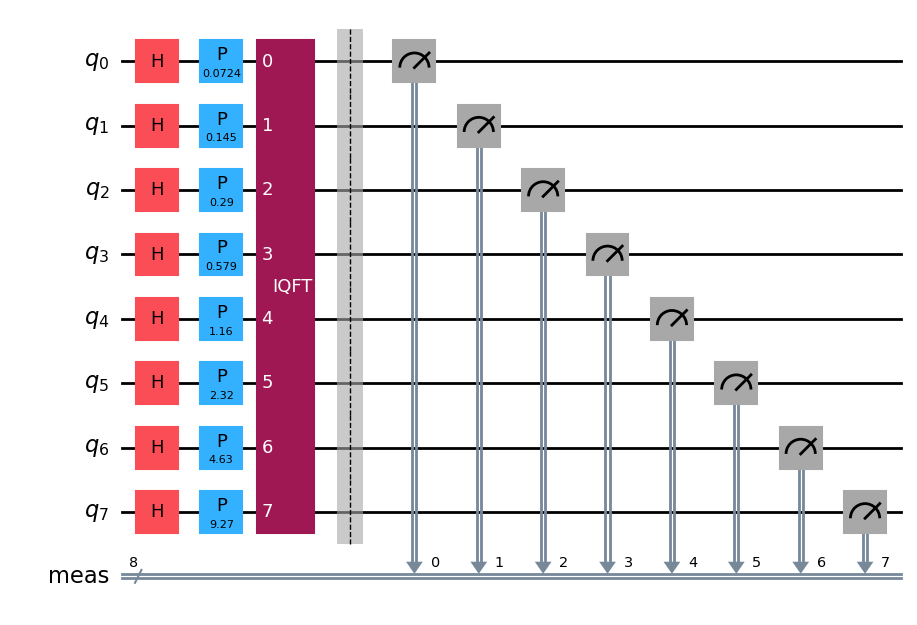

Circuito IQFT para 3.74


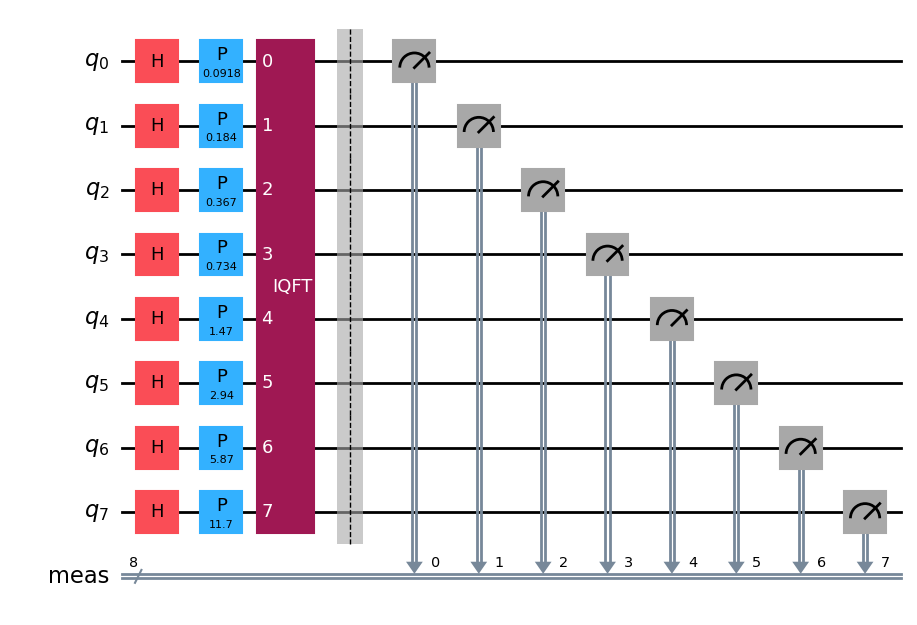

Circuito IQFT para 4.49


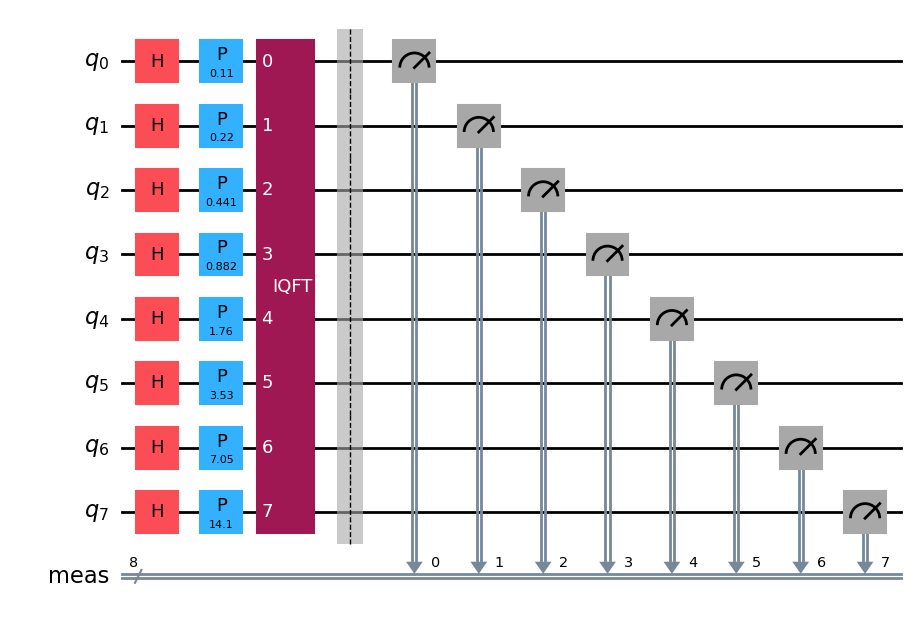

Circuito IQFT para 2.78


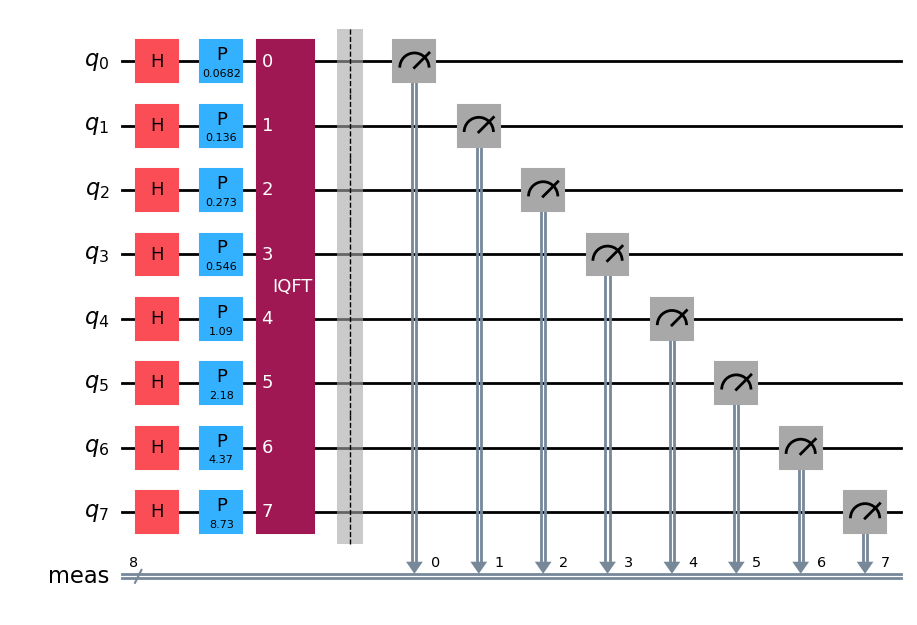

Circuito IQFT para 2.25


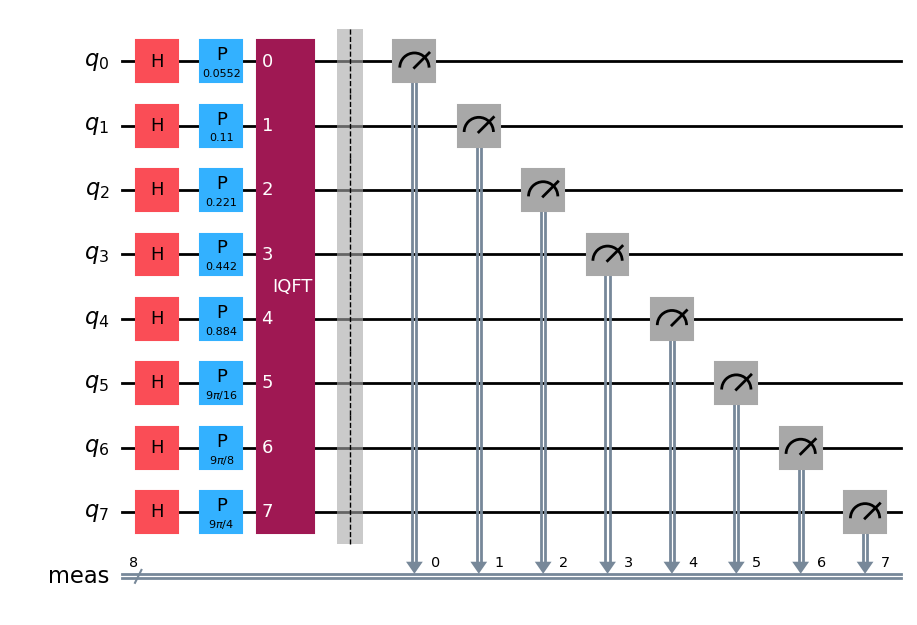

Períodos calculados = [4, 5, 3, 3, 3, 5, 3, 2]


In [6]:
def fourrier_quantum(num_qubits,medicoes_lista):
    
    periodos = []

    for i, periodo in enumerate(medicoes_lista):
        
        qc = QuantumCircuit(num_qubits)

        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)

        qc.measure_all()
        print("Circuito IQFT para",periodo)
        display(qc.draw('mpl'))


        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)

        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()


        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
        
        

    return periodos

periodos_resultados = fourrier_quantum(n, medicoes_com_erro)
print("Períodos calculados =", periodos_resultados)

In [7]:
media_periodos = np.mean(medicoes_com_erro)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média após o Circuito",media_periodos_iqft)

Média antes do Circuito: 3.54625
Média após o Circuito 3.5


### Discussão dos resultados obtidos

<h1 style="text-align: center;">3. Terceiro Passo</h1>



### A)

In [12]:
medicoes_lista = [] 
n = rd.randint(4,10)

for i in range(n):
    j = round(rd.uniform(2,5),2)
    medicoes_lista.append(j)

def calcular_bits(n):
    if n < 1:
        return 0
    return math.floor(math.log2(n)) + 1

num_qubits=calcular_bits(n)
print("Número de Medições:",n)
print(f"Número de bits necessários: {num_qubits}")


Número de Medições: 5
Número de bits necessários: 3


In [13]:
medicoes_com_erro = []
for m in medicoes_lista:
    erro_percentual = rd.uniform(-0.1, 0.1) 
    valor_com_erro = round(m * (1 + erro_percentual), 2)
    medicoes_com_erro.append(valor_com_erro)

print("Períodos com Erro =", medicoes_com_erro)

Períodos com Erro = [2.29, 4.72, 3.1, 4.76, 5.16]


### B)

Circuito IQFT para 2.29


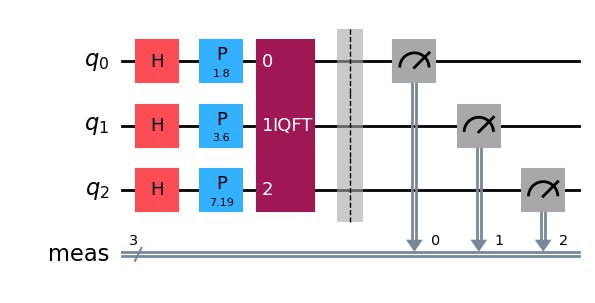

Circuito IQFT para 4.72


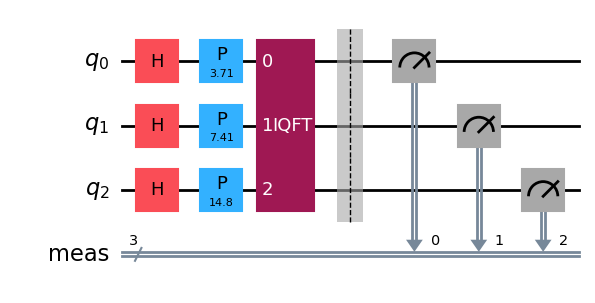

Circuito IQFT para 3.1


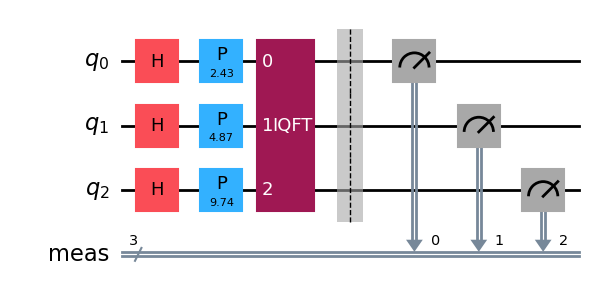

Circuito IQFT para 4.76


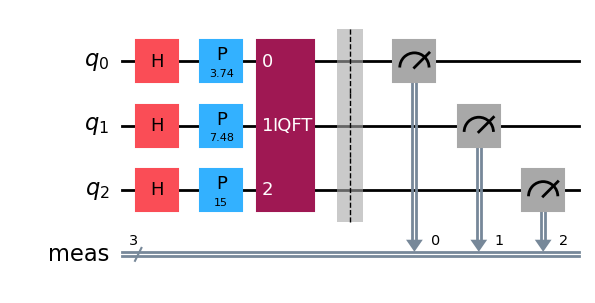

Circuito IQFT para 5.16


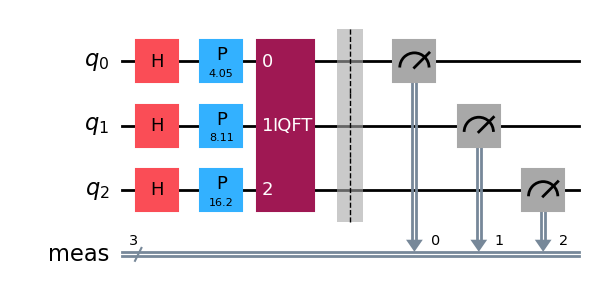

Períodos calculados = [2, 5, 3, 5, 5]


In [14]:
def fourrier_quantum(num_qubits,medicoes_lista):
    
    periodos = []

    for i, periodo in enumerate(medicoes_lista):
        
        qc = QuantumCircuit(num_qubits)

        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)

        qc.measure_all()
        print("Circuito IQFT para",periodo)
        display(qc.draw('mpl'))


        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)

        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()


        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
        
        

    return periodos

periodos_resultados = fourrier_quantum(num_qubits, medicoes_com_erro)
print("Períodos calculados =", periodos_resultados)

In [15]:
media_periodos = np.mean(medicoes_com_erro)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média após o Circuito",media_periodos_iqft)

Média antes do Circuito: 4.006
Média após o Circuito 4.0


C)

In [16]:
import random as rd
import math
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import StatevectorSampler
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

# Função para calcular a quantidade de bits necessária
def calcular_bits(n):
    if n < 1:
        return 0
    return math.floor(math.log2(n)) + 1

# Função principal para cálculo com IQFT
def fourrier_quantum(num_qubits, medicoes_lista):
    periodos = []

    for periodo in medicoes_lista:
        qc = QuantumCircuit(num_qubits)
        # Adicionar portas Hadamard
        for i in range(num_qubits):
            qc.h(i)
        # Adicionar fase de acordo com os períodos
        for i in range(num_qubits):
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)
        # Aplicar IQFT
        qc.append(QFT(num_qubits, inverse=True), qc.qubits)
        qc.measure_all()

        # Simular e calcular os resultados
        sampler = StatevectorSampler()
        job_sampler = sampler.run([qc], shots=1)
        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()

        # Converter bitstrings para valores inteiros
        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
    
    return periodos

# Processo iterativo
n = rd.randint(4, 10)
medicoes_lista = [round(rd.uniform(2, 5), 2) for _ in range(n)]

# Inicializar valores
num_qubits = calcular_bits(n)
tolerancia = 0.1  # Diferença máxima permitida entre as médias
diferenca_percentual = float('inf')  # Iniciar com valor infinito
iteracoes = 0  # Contar o número de iterações

while diferenca_percentual > tolerancia:
    # Adicionar erro percentual às medições
    medicoes_com_erro = [
        round(m * (1 + rd.uniform(-0.1, 0.1)), 2) for m in medicoes_lista
    ]
    # Calcular períodos via IQFT
    periodos_resultados = fourrier_quantum(num_qubits, medicoes_com_erro)
    
    # Calcular médias
    media_periodos = np.mean(medicoes_com_erro)
    media_periodos_iqft = np.mean(periodos_resultados)
    # Calcular diferença percentual
    diferenca_percentual = abs(media_periodos - media_periodos_iqft) / media_periodos
    print(f"Iteração {iteracoes + 1}:")
    print(f"  Média antes do circuito: {media_periodos:.2f}")
    print(f"  Média após o circuito: {media_periodos_iqft:.2f}")
    print(f"  Diferença percentual: {diferenca_percentual:.2%}")
    
    if diferenca_percentual > tolerancia:
        # Aumentar número de qubits e repetir
        num_qubits += 1
        iteracoes += 1
    else:
        break

# Exibir resultados finais
desvio_padrao = np.std(medicoes_com_erro)
print("\nResultados Finais:")
print(f"  Número de bits utilizados: {num_qubits}")
print(f"  Média final das medições: {media_periodos:.2f}")
print(f"  Média final IQFT: {media_periodos_iqft:.2f}")
print(f"  Desvio padrão das medições: {desvio_padrao:.2f}")


ImportError: cannot import name 'StatevectorSampler' from 'qiskit.quantum_info' (/home/guipagani/Área de trabalho/GS_QUANTICA/venv/lib/python3.12/site-packages/qiskit/quantum_info/__init__.py)